# Assignment 1: Data Quality Management, Integration, and Prediction for Healthcare Operations and Decision Making
Group 2 - Team 5


# 1. Introduction

The COVID-19 pandemic has pushed society and governements to their breaking points. National and local governments, as well as their heath systems, had to shift during the pandemic from reacting quickly to unforseen events to coordinating resources and putting emergence plans in place. Decision-making needs to be informed by data and predictive analysis. In hindsight, many governments and communicties may have acted differently, but managing patient hospitalizations was a public health issue that impacted all regions, nations, and continents. 

This report looks at COVID-19 health data of the county San Diego, in the state of California. The aim of this report is to first look at the different ways the data are ordered and find a way to merge the different data sets. After which several different machine learning models will be used to predict the number of hospitalizations two weeks into the future. the main goal of this report is to find a model that can be used to predict hospitalizations. The following structure will be used:
- Exploratory analysis of the datasets and identify potential alignment problems
- Clean the data, identify and solve non-values
- Use different machine learning models to predict hospitalizations
- Compare and choose the best model

# 1.1 Exploratory analysis

In this section we will cover the three main datasets. We start with the vaccination data. Subsequently we will cover the dataset considering cases and deaths. And lastly we will cover data about the hospitalizations.

## Vaccination data

This section of the report will focus on exploring and understanding the vaccination data.

In [8]:
import pandas as pd

In [9]:
df_vaccinations = pd.read_csv("vaccinations.csv")

First we will look at the data types. 

In [10]:
df_vaccinations.dtypes

as_of_date                                     object
zip_code_tabulation_area                        int64
local_health_jurisdiction                      object
county                                         object
vaccine_equity_metric_quartile                float64
vem_source                                     object
age12_plus_population                         float64
persons_fully_vaccinated                      float64
persons_partially_vaccinated                  float64
percent_of_population_fully_vaccinated        float64
percent_of_population_partially_vaccinated    float64
percent_of_population_with_1_plus_dose        float64
redacted                                       object
dtype: object

Looking at the datatypes of the columns we see that there are 3 columns which are in the wrong format:
- date: the date is labeled as object but it should be converted to datetime
- age12_plus_population: should be integer instead of float

Next we will look at the first few entries of the database to get a feeling of what we are dealing with.


In [11]:
df_vaccinations.head()

,as_of_date,zip_code_tabulation_area,local_health_jurisdiction,county,vaccine_equity_metric_quartile,vem_source,age12_plus_population,persons_fully_vaccinated,persons_partially_vaccinated,percent_of_population_fully_vaccinated,percent_of_population_partially_vaccinated,percent_of_population_with_1_plus_dose,redacted
0,05/01/2021,94607,Alameda,Alameda,2.0,Healthy Places Index Score,23966.5,NaN,NaN,NaN,NaN,NaN,Information redacted in accordance with CA sta...
1,05/01/2021,94588,Alameda,Alameda,4.0,Healthy Places Index Score,31505.2,17.0,497.0,0.000540,0.015775,0.016315,No
2,05/01/2021,94502,Alameda,Alameda,4.0,Healthy Places Index Score,12428.7,NaN,NaN,NaN,NaN,NaN,Information redacted in accordance with CA sta...
3,05/01/2021,94568,Alameda,Alameda,4.0,Healthy Places Index Score,45158.5,22.0,1105.0,0.000487,0.024469,0.024956,No
4,05/01/2021,94501,Alameda,Alameda,4.0,Healthy Places Index Score,54913.3,15.0,1490.0,0.000273,0.027134,0.027407,No


From the overview above, we can note that, due to privacy reasons, entries are redacted from the dataset. Furthermore the data is organized per zip code instead of county. In the data cleaning we should consider this because we only care about the totals per county. Next we will check the structure of the dates. To do this, we have to convert the dtype to a datetime object.

In [12]:
df_vaccinations["as_of_date"]= pd.to_datetime(df_vaccinations["as_of_date"],format="%d/%m/%Y")

In [13]:
df_vaccinations["as_of_date"].unique()
df_vaccinations["as_of_date"].min()
df_vaccinations["as_of_date"].max()

Timestamp('2021-09-28 00:00:00')

From the information above it becomes evident that we are dealing with weekly data. Furthermore the first date entry is at 05-01-2021 and the last entry is at 28-09-2021. To end our first exploratory analysis we will set the index of the dataframe to the date.

In [14]:
df_vaccinations.set_index("as_of_date", inplace = True)

## Cases and deaths

The emphasis of this part of the report will be examining and grasping the data regarding cases and deaths. 

In [15]:
df_casesdeaths = pd.read_csv("cases_and_deaths.csv")

In [16]:
df_casesdeaths.dtypes

date                           object
area                           object
area_type                      object
population                    float64
cases                         float64
cumulative_cases              float64
deaths                        float64
cumulative_deaths             float64
total_tests                   float64
cumulative_total_tests          int64
positive_tests                float64
cumulative_positive_tests       int64
reported_cases                float64
cumulative_reported_cases     float64
reported_deaths               float64
cumulative_reported_deaths    float64
reported_tests                float64
dtype: object

Certain datatypes seem incorrect:
date should be of date type
population, cases, cumulative_cases, deaths, cumulative_deaths, total_tests, positive_tests, reported_cases, cumulative_reported_cases, reported_cases, cumulative_reported_cases, reported_deaths, cumulative_reported_deaths, reported_tests: should all be integer

For further analysis we will only replace the date datatype for now.

In [17]:
df_casesdeaths["date"]= pd.to_datetime(df_casesdeaths["date"],format="%d/%m/%Y")

In [18]:
df_casesdeaths.head()


,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


Looking at the data, the main takeaway is that the dates seem to be in a daily order instead of the weekly data that we found with the vaccinations data. Moreover, it seems that the population data is constant. To check this, we will get back the value of population of the first 30 rows.

In [19]:
df_casesdeaths.head(30)

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN
5,2020-02-06,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN
6,2020-02-07,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN
7,2020-02-08,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN
8,2020-02-09,Alameda,County,1685886.0,1.0,4.0,0.0,0.0,1.0,7,0.0,0,0.0,0.0,0.0,0.0,NaN
9,2020-02-10,Alameda,County,1685886.0,0.0,4.0,0.0,0.0,0.0,7,0.0,0,0.0,0.0,0.0,0.0,NaN


Based on the information above, we can confirm that the attribute population stays constant for alameda over several weeks. This data is probably noise and will be dropped in the section about data cleaning. Subsequently, we will look at the minimum and maximum date.

In [20]:
df_casesdeaths["date"].min()
df_casesdeaths["date"].max()

Timestamp('2021-10-03 00:00:00')

The first data entry is at 01-02-2020 and the last at 03-10-2021, which is a difference range than the dataset of the vaccinations. Consequently, we will set the date as the index of the dataframe.

In [21]:
df_casesdeaths.set_index("date", inplace = True)

## Hospitalizations

This part of the report will concentrate on exploring the hospitalizations data. 

In [22]:
df_hospitalizations = pd.read_csv("hospitalisations.csv")

In [23]:
df_hospitalizations.dtypes

county                                    object
todays_date                               object
hospitalized_covid_confirmed_patients    float64
hospitalized_suspected_covid_patients    float64
hospitalized_covid_patients              float64
all_hospital_beds                        float64
icu_covid_confirmed_patients             float64
icu_suspected_covid_patients             float64
icu_available_beds                       float64
dtype: object

Looking at the datatypes it becomes apparent that the date should be converted to a datetime. Furthermore, while it is not wrong to store the other variables (apart from county) as a float, it is better for memory usage to convert them to integer values. This can be done because we do not expect float values for these attributes. Next we change the date to datetime object and check the first data entries.

In [24]:
df_hospitalizations["todays_date"]= pd.to_datetime(df_hospitalizations["todays_date"],format="%d/%m/%Y")

In [25]:
df_hospitalizations.head()

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Yuba,2021-05-05,9.0,0.0,9.0,261.0,1.0,0.0,7.0
1,San Bernardino,2020-08-17,441.0,80.0,521.0,3851.0,130.0,16.0,138.0
2,Madera,2021-01-06,57.0,4.0,61.0,282.0,11.0,0.0,2.0
3,Sacramento,2021-07-30,204.0,22.0,226.0,2619.0,47.0,3.0,83.0
4,Kings,2020-12-02,58.0,1.0,59.0,193.0,11.0,0.0,7.0


Subsequently, we will check if the data is daily or weekly. Additionally, the data seems unstructered and not ordered. To fix this, we will first set the index as todays_date and sort by todays date to get a better understanding.

In [26]:
df_hospitalizations.set_index("todays_date", inplace = True)

In [27]:
df_hospitalizations.sort_index()

,county,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
todays_date,,,,,,,,
2020-03-29,Sutter,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2020-03-29,Lake,0.0,1.0,NaN,NaN,0.0,1.0,2.0
2020-03-29,Mendocino,1.0,11.0,NaN,NaN,0.0,0.0,1.0
2020-03-29,Lassen,0.0,2.0,NaN,NaN,0.0,0.0,NaN
2020-03-29,San Bernardino,33.0,123.0,NaN,NaN,19.0,20.0,65.0
...,...,...,...,...,...,...,...,...
2021-10-03,San Francisco,65.0,3.0,68.0,2165.0,28.0,1.0,91.0
2021-10-03,El Dorado,7.0,0.0,7.0,190.0,6.0,0.0,10.0
2021-10-03,Stanislaus,196.0,14.0,210.0,1375.0,44.0,4.0,25.0


We want to check if it is daily or weekly data. 

In [28]:
sorted(df_hospitalizations.index.unique().tolist())

[Timestamp('2020-03-29 00:00:00'),
 Timestamp('2020-03-30 00:00:00'),
 Timestamp('2020-03-31 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-04-02 00:00:00'),
 Timestamp('2020-04-03 00:00:00'),
 Timestamp('2020-04-04 00:00:00'),
 Timestamp('2020-04-05 00:00:00'),
 Timestamp('2020-04-06 00:00:00'),
 Timestamp('2020-04-07 00:00:00'),
 Timestamp('2020-04-08 00:00:00'),
 Timestamp('2020-04-09 00:00:00'),
 Timestamp('2020-04-10 00:00:00'),
 Timestamp('2020-04-11 00:00:00'),
 Timestamp('2020-04-12 00:00:00'),
 Timestamp('2020-04-13 00:00:00'),
 Timestamp('2020-04-14 00:00:00'),
 Timestamp('2020-04-15 00:00:00'),
 Timestamp('2020-04-16 00:00:00'),
 Timestamp('2020-04-17 00:00:00'),
 Timestamp('2020-04-18 00:00:00'),
 Timestamp('2020-04-19 00:00:00'),
 Timestamp('2020-04-20 00:00:00'),
 Timestamp('2020-04-21 00:00:00'),
 Timestamp('2020-04-22 00:00:00'),
 Timestamp('2020-04-23 00:00:00'),
 Timestamp('2020-04-24 00:00:00'),
 Timestamp('2020-04-25 00:00:00'),
 Timestamp('2020-04-

The information above shows us that we are dealing with daily data, ranging from 29-03-2020 to 03-10-2021. 

# 1.2 Allignment problems

Looking back at the exploratory analysis, a few allignment problems arise that need to be solved. These problems can be divided into semantic and syntactic problems.

### 1.2.1 Syntactic allignment problems

Syntactic allignment problems are problems considering the structure of the different data sets. The syntactic problems in this instance are:
- The key for the date is different across all datasets. The column names for the date are:"as_of_date","date" and "todays_date".
- The range of dates is different across the datasets. This does not neccesarily need to be a problem but needs to be looked at dataset by dataset. This will be done and explained in the data cleaning section.
- The vaccination data is weekly data, whereas the other datasets are of daily data. Therefore data manipulation needs to be done so that the datasets can be combined.
- Some datasets report per county and some per zip code, this also needs to be corrected.

### 1.2.2 Semantic allignment problems

Semantic allignment problems are with regards to how the data is interpreted and if it is meaningfull to combine different datasets. Looking at our datasets, you could argue that in the dataset about cases and deaths the cumulative is important, whereas it is probably not important for our problem. Moreover, the dataset about holidays is not binary. We therefore need to change this to a binary dataset.

# 2 Data cleaning, alignment and preparation

In this chapter we will do datacleaning and manipulation to combat the syntactic and semantic allignment problems discussed above. We will do this for each dataset, after which the datasets will be merged. Furthermore, we will merge the datasets as preparation for the prediction task.

## 2.1 Data cleaning

We will start with cleaning each dataset. 

### 2.1.1 Vaccination data

First we will go over the data's characteristics, again. 

In [29]:
df_vaccinations.head()

,zip_code_tabulation_area,local_health_jurisdiction,county,vaccine_equity_metric_quartile,vem_source,age12_plus_population,persons_fully_vaccinated,persons_partially_vaccinated,percent_of_population_fully_vaccinated,percent_of_population_partially_vaccinated,percent_of_population_with_1_plus_dose,redacted
as_of_date,,,,,,,,,,,,
2021-01-05,94607,Alameda,Alameda,2.0,Healthy Places Index Score,23966.5,NaN,NaN,NaN,NaN,NaN,Information redacted in accordance with CA sta...
2021-01-05,94588,Alameda,Alameda,4.0,Healthy Places Index Score,31505.2,17.0,497.0,0.000540,0.015775,0.016315,No
2021-01-05,94502,Alameda,Alameda,4.0,Healthy Places Index Score,12428.7,NaN,NaN,NaN,NaN,NaN,Information redacted in accordance with CA sta...
2021-01-05,94568,Alameda,Alameda,4.0,Healthy Places Index Score,45158.5,22.0,1105.0,0.000487,0.024469,0.024956,No
2021-01-05,94501,Alameda,Alameda,4.0,Healthy Places Index Score,54913.3,15.0,1490.0,0.000273,0.027134,0.027407,No


We want to filter out all data that is not data about the county San Diego. The reason behind this is that this report exclusively focuses on San Diego. 

In [30]:
df_vaccinations = df_vaccinations[df_vaccinations['county'].str.lower() == 'san diego'].copy()

In [31]:
df_vaccinations["county"].unique()

array(['San Diego'], dtype=object)

We have successfully filtered out data that is not about San Diego. Looking at the dataset and what attributes we are interested in, it becomes clear that we care about the following columns:
- age12_plus_population
- persons_fully_vaccinated
- persons_partially_vaccinated

We do not care about the percentages, because this is derived from the above metrics. Furthermore, we want the data about the whole county of San Diego, which is not underdivided between different zip codes. To achieve this, we can group by day for these different columns. 

In [32]:
df_vaccinations = df_vaccinations.groupby('as_of_date')[['age12_plus_population', 'persons_fully_vaccinated', 'persons_partially_vaccinated']].sum()

Now we will check for missing values, if there are any.

In [33]:
df_vaccinations.info()
print(df_vaccinations.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39 entries, 2021-01-05 to 2021-09-28
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age12_plus_population         39 non-null     float64
 1   persons_fully_vaccinated      39 non-null     float64
 2   persons_partially_vaccinated  39 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB
(39, 3)


There are no missing values in the dataset. This is due to the fact that we summed the values together. So if there is a NA in the dataset, this is simply not added to the count. This way we dealt with the missing values from the original dataset.

Remember that we still need to adjust the datatypes of these columns, we will do that now.

In [34]:
df_vaccinations = df_vaccinations.astype({'age12_plus_population': int, 'persons_fully_vaccinated': int, 'persons_partially_vaccinated': int})

In [35]:
df_vaccinations.dtypes

age12_plus_population           int32
persons_fully_vaccinated        int32
persons_partially_vaccinated    int32
dtype: object

We have succesfully changed the datatype to integer. 

The next step is to try to change the data from weekly to daily, since there is only data available one day per week. We will spread this out, to have data for all days of the week. This way the data set can be merged with the other data sets. We assume that the values can be evenly spread throughout the days, since it is possible in San Diego to get a vaccin each day of the week. 

source: https://www.sandiegocounty.gov/content/sdc/hhsa/programs/phs/community_epidemiology/dc/2019-nCoV/vaccines/COVID-19-VaxEvents.html

In [36]:
# get values for all days in dataset for age12plus, person fully vaccinated and persons partially vaccinated

# Resampling the DataFrame to daily frequency
df_vaccinations = df_vaccinations.resample('D').asfreq()
# Columns to be filled with incremental 7-day interval averages
columns_to_fill = ['age12_plus_population', 'persons_fully_vaccinated', 'persons_partially_vaccinated']

# Calculate incremental averages for each 7-day interval and fill missing values in the resampled data
for col in columns_to_fill:
    # Iterate through each 7-day period
    for i in range(0, len(df_vaccinations)):
        # Calculate the average increment for the current 7-day period
        if i % 7 == 0 and i + 7 < len(df_vaccinations):
            start_value = df_vaccinations[col].iloc[i]
            end_value = df_vaccinations[col].iloc[i + 7]
            average_increment = (end_value - start_value) / 7

            # Fill in missing values with this increment
            for j in range(1, 7):
                if pd.isna(df_vaccinations[col].iloc[i + j]):
                    df_vaccinations[col].iloc[i + j] = start_value + average_increment * j

# Rounding the filled data
df_vaccinations = df_vaccinations.round()


In [37]:
df_vaccinations.head(30)

,age12_plus_population,persons_fully_vaccinated,persons_partially_vaccinated
as_of_date,,,
2021-01-05,2825624.0,1942.0,56409.0
2021-01-06,2825624.0,4245.0,58538.0
2021-01-07,2825624.0,6547.0,60666.0
2021-01-08,2825624.0,8850.0,62795.0
2021-01-09,2825624.0,11152.0,64924.0
2021-01-10,2825624.0,13455.0,67053.0
2021-01-11,2825624.0,15757.0,69181.0
2021-01-12,2825624.0,18060.0,71310.0
2021-01-13,2825624.0,20267.0,78584.0


We have succesfully incremented the data over the days. Consequently, we will check if there are any null values.

In [38]:
df_vaccinations.info()
df_vaccinations.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 267 entries, 2021-01-05 to 2021-09-28
Freq: D
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age12_plus_population         267 non-null    float64
 1   persons_fully_vaccinated      267 non-null    float64
 2   persons_partially_vaccinated  267 non-null    float64
dtypes: float64(3)
memory usage: 8.3 KB


(267, 3)

There are no null values. So, we can move on to the next dataset

In [39]:
df_vaccinations.to_csv("finalvaccinations.csv")

### 2.1.2 Cases and deaths

First we look at the features of the data. However, we have to reload the dataset, because we need to retrieve the index using integers. 

In [40]:
df_casesdeaths = pd.read_csv("cases_and_deaths.csv")
df_casesdeaths.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,01/02/2020,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,02/02/2020,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,03/02/2020,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,04/02/2020,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,05/02/2020,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


Like with the vaccination data, we are only interested in the data regarding the county of San Diego.

In [41]:
df_casesdeaths = df_casesdeaths[df_casesdeaths["area"].str.lower() == "san diego"].copy()

In [42]:
df_casesdeaths["area"].unique()

array(['San Diego'], dtype=object)

All the data about other counties has been filtered out. Subsequently, we will check for missing values.

In [43]:
df_casesdeaths.info()
df_casesdeaths.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 22644 to 23255
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        611 non-null    object 
 1   area                        612 non-null    object 
 2   area_type                   612 non-null    object 
 3   population                  612 non-null    float64
 4   cases                       612 non-null    float64
 5   cumulative_cases            612 non-null    float64
 6   deaths                      612 non-null    float64
 7   cumulative_deaths           612 non-null    float64
 8   total_tests                 611 non-null    float64
 9   cumulative_total_tests      612 non-null    int64  
 10  positive_tests              611 non-null    float64
 11  cumulative_positive_tests   612 non-null    int64  
 12  reported_cases              612 non-null    float64
 13  cumulative_reported_cases   6

(612, 17)

Based on the information above, we can see that some columns have missing values. Since there are missing values, our next step is to check per column how many missing datapoints there are.

If we know the humber of missing datapoints, we will generate a heatmap to get a better understanding where these are missing.

In [44]:
for column in df_casesdeaths.columns:
    missing_count = pd.isna(df_casesdeaths[column]).sum()
    print(f"Column: {column}, Missing value count: {missing_count}")

Column: date, Missing value count: 1
Column: area, Missing value count: 0
Column: area_type, Missing value count: 0
Column: population, Missing value count: 0
Column: cases, Missing value count: 0
Column: cumulative_cases, Missing value count: 0
Column: deaths, Missing value count: 0
Column: cumulative_deaths, Missing value count: 0
Column: total_tests, Missing value count: 1
Column: cumulative_total_tests, Missing value count: 0
Column: positive_tests, Missing value count: 1
Column: cumulative_positive_tests, Missing value count: 0
Column: reported_cases, Missing value count: 0
Column: cumulative_reported_cases, Missing value count: 0
Column: reported_deaths, Missing value count: 0
Column: cumulative_reported_deaths, Missing value count: 0
Column: reported_tests, Missing value count: 114


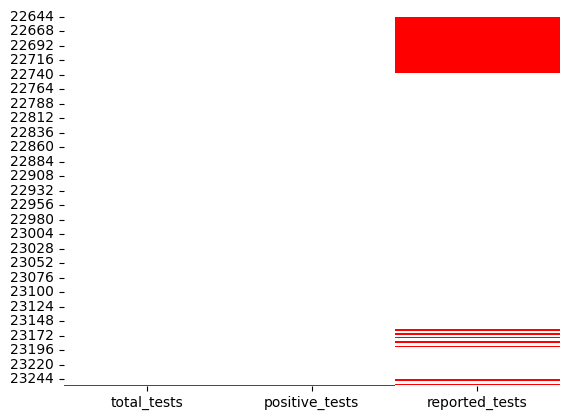

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = df_casesdeaths[[ "total_tests", "positive_tests", "reported_tests"]]

sns.heatmap(plot_data.isnull(), cbar = False, cmap=sns.color_palette(['white', 'red']))
plt.show()

The first three columns have one missing value at the end of the dataset. reported_tests has the most missing values in the beginning, and some missing values at the end. For reported tests, it seems reasonable to think that there were no tests available in the beginning of COVID. An underlying reason may be related to distribution challenges of test, at the beginning of the pandemic. We could change these values to 0. The other missing values could be filled in.

In [46]:
df_casesdeaths.loc[:99, 'reported_tests'] = df_casesdeaths.loc[:99, 'reported_tests'].fillna(0)

The rest of the missing values will be filled by interpolation.

In [47]:
df_casesdeaths['reported_tests'] = df_casesdeaths['reported_tests'].interpolate(method='linear', limit_direction='both')

In [48]:
df_casesdeaths['positive_tests'] = df_casesdeaths['positive_tests'].interpolate(method='linear', limit_direction='both')

In [49]:
df_casesdeaths['total_tests'] = df_casesdeaths['total_tests'].interpolate(method='linear', limit_direction='both')

Now that the missing values are filled, we will index the data according to the date.

In [50]:
df_casesdeaths["date"]= pd.to_datetime(df_casesdeaths["date"],format="%d/%m/%Y")

In [51]:
df_casesdeaths['date'] = df_casesdeaths['date'].fillna(df_casesdeaths['date'].shift(1) + pd.Timedelta(days=1))

In [52]:
df_casesdeaths.info()
df_casesdeaths.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 22644 to 23255
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        612 non-null    datetime64[ns]
 1   area                        612 non-null    object        
 2   area_type                   612 non-null    object        
 3   population                  612 non-null    float64       
 4   cases                       612 non-null    float64       
 5   cumulative_cases            612 non-null    float64       
 6   deaths                      612 non-null    float64       
 7   cumulative_deaths           612 non-null    float64       
 8   total_tests                 612 non-null    float64       
 9   cumulative_total_tests      612 non-null    int64         
 10  positive_tests              612 non-null    float64       
 11  cumulative_positive_tests   612 non-null    int64   

(612, 17)

We have no missing values anymore. Our final step involves to convert the data type to integer.

In [53]:
df_casesdeaths = df_casesdeaths.astype({'population':int, 'cases':int,
                                                      'cumulative_cases':int, 'deaths':int,
                                                      'cumulative_deaths':int, 'total_tests':int,
                                                      'positive_tests':int, 'reported_cases':int,
                                                      'cumulative_reported_cases':int, 'reported_deaths':int,
                                                      'cumulative_reported_deaths':int, 'reported_tests':int}
                                                     )

In [54]:
df_casesdeaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 22644 to 23255
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        612 non-null    datetime64[ns]
 1   area                        612 non-null    object        
 2   area_type                   612 non-null    object        
 3   population                  612 non-null    int32         
 4   cases                       612 non-null    int32         
 5   cumulative_cases            612 non-null    int32         
 6   deaths                      612 non-null    int32         
 7   cumulative_deaths           612 non-null    int32         
 8   total_tests                 612 non-null    int32         
 9   cumulative_total_tests      612 non-null    int64         
 10  positive_tests              612 non-null    int32         
 11  cumulative_positive_tests   612 non-null    int64   

The dataset regarding cases and deaths has been cleaned and missing values are accounted for. Now we can take a look at the hospitalizations dataset. 

In [55]:
df_casesdeaths.to_csv("finalcasesdeaths.csv")

### 2.1.3 Hospitalizations

First, we wil take a look at the dataset, again.

In [56]:
df_hospitalizations.head()

,county,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
todays_date,,,,,,,,
2021-05-05,Yuba,9.0,0.0,9.0,261.0,1.0,0.0,7.0
2020-08-17,San Bernardino,441.0,80.0,521.0,3851.0,130.0,16.0,138.0
2021-01-06,Madera,57.0,4.0,61.0,282.0,11.0,0.0,2.0
2021-07-30,Sacramento,204.0,22.0,226.0,2619.0,47.0,3.0,83.0
2020-12-02,Kings,58.0,1.0,59.0,193.0,11.0,0.0,7.0


Like in the sections before, we filter out all other counties except for San Diego.

In [57]:
df_hospitalizations = df_hospitalizations[df_hospitalizations['county'].str.lower() == 'san diego'].copy()

In [58]:
df_hospitalizations["county"].unique()

array(['San Diego'], dtype=object)

The other counties are filtered out successfully. Next, we will sort by date.

In [59]:
df_hospitalizations.sort_index()

,county,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
todays_date,,,,,,,,
2020-03-29,San Diego,121.0,211.0,NaN,NaN,77.0,39.0,205.0
2020-03-30,San Diego,146.0,446.0,NaN,NaN,72.0,23.0,228.0
2020-03-31,San Diego,158.0,408.0,NaN,NaN,75.0,39.0,208.0
2020-04-01,San Diego,168.0,340.0,NaN,NaN,71.0,32.0,215.0
2020-04-02,San Diego,144.0,343.0,NaN,NaN,69.0,35.0,206.0
...,...,...,...,...,...,...,...,...
2021-09-29,San Diego,351.0,13.0,364.0,6493.0,114.0,3.0,197.0
2021-09-30,San Diego,345.0,20.0,365.0,6495.0,111.0,0.0,203.0
2021-10-01,San Diego,337.0,19.0,356.0,6489.0,107.0,0.0,196.0


The data is now sorted correctly. Subsequently, we will check for missing values.

In [60]:
df_hospitalizations.info()
df_hospitalizations.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 554 entries, 2020-05-24 to 2021-08-08
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   county                                 554 non-null    object 
 1   hospitalized_covid_confirmed_patients  554 non-null    float64
 2   hospitalized_suspected_covid_patients  554 non-null    float64
 3   hospitalized_covid_patients            531 non-null    float64
 4   all_hospital_beds                      531 non-null    float64
 5   icu_covid_confirmed_patients           554 non-null    float64
 6   icu_suspected_covid_patients           554 non-null    float64
 7   icu_available_beds                     554 non-null    float64
dtypes: float64(7), object(1)
memory usage: 39.0+ KB


(554, 8)

Looking at the insights above, we can conclude that there are several missing values. We will look into this in more detail.

In [61]:
for column in df_hospitalizations.columns:
    missing_count = pd.isna(df_hospitalizations[column]).sum()
    print(f"Columns: {column}, Missing value count: {missing_count}")

Columns: county, Missing value count: 0
Columns: hospitalized_covid_confirmed_patients, Missing value count: 0
Columns: hospitalized_suspected_covid_patients, Missing value count: 0
Columns: hospitalized_covid_patients, Missing value count: 23
Columns: all_hospital_beds, Missing value count: 23
Columns: icu_covid_confirmed_patients, Missing value count: 0
Columns: icu_suspected_covid_patients, Missing value count: 0
Columns: icu_available_beds, Missing value count: 0


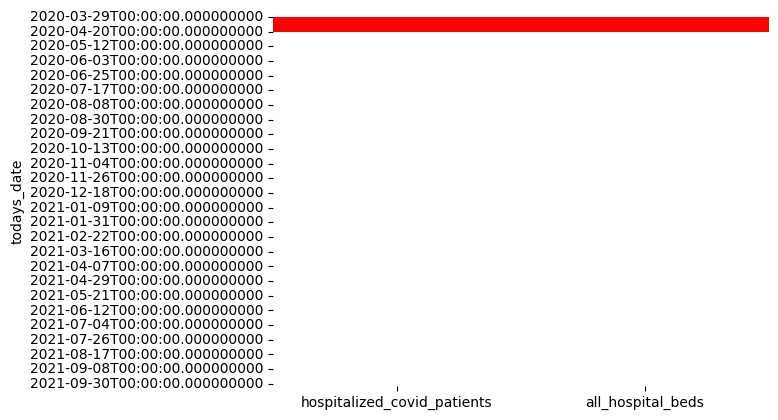

In [62]:
hosp_plot = df_hospitalizations[["hospitalized_covid_patients", "all_hospital_beds"]].copy()
hosp_plot.sort_index(inplace=True)
sns.heatmap(hosp_plot.isnull(), cbar = False, cmap=sns.color_palette(['white', 'red']))
plt.show()

The missing values for both columns are the same, and are both in the beginning, all being in 2020. We choose to delete these missing values. Since these values are in the initial stage, it would be challenging to predict these values. However, deleting the columns would be unwise.

In [63]:
df_hospitalizations = df_hospitalizations.dropna()

In [64]:
df_hospitalizations.info()
df_hospitalizations.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 531 entries, 2020-05-24 to 2021-08-08
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   county                                 531 non-null    object 
 1   hospitalized_covid_confirmed_patients  531 non-null    float64
 2   hospitalized_suspected_covid_patients  531 non-null    float64
 3   hospitalized_covid_patients            531 non-null    float64
 4   all_hospital_beds                      531 non-null    float64
 5   icu_covid_confirmed_patients           531 non-null    float64
 6   icu_suspected_covid_patients           531 non-null    float64
 7   icu_available_beds                     531 non-null    float64
dtypes: float64(7), object(1)
memory usage: 37.3+ KB


(531, 8)

We have no more missing values anymore. We do still need to change the datatypes to integer.

In [65]:
df_hospitalizations = df_hospitalizations.astype({'hospitalized_covid_confirmed_patients':int, 'hospitalized_suspected_covid_patients':int,
                                'hospitalized_covid_patients':int, 'all_hospital_beds':int,
                                'icu_covid_confirmed_patients':int, 'icu_suspected_covid_patients':int,
                                'icu_available_beds':int}
                               )

In [66]:
df_hospitalizations.info()
df_hospitalizations.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 531 entries, 2020-05-24 to 2021-08-08
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   county                                 531 non-null    object
 1   hospitalized_covid_confirmed_patients  531 non-null    int32 
 2   hospitalized_suspected_covid_patients  531 non-null    int32 
 3   hospitalized_covid_patients            531 non-null    int32 
 4   all_hospital_beds                      531 non-null    int32 
 5   icu_covid_confirmed_patients           531 non-null    int32 
 6   icu_suspected_covid_patients           531 non-null    int32 
 7   icu_available_beds                     531 non-null    int32 
dtypes: int32(7), object(1)
memory usage: 22.8+ KB


(531, 8)

The datatypes are successfully changed.

In [67]:
df_hospitalizations.to_csv("finalhospital.csv")

### 2.1.4 Holidays

This section will cover the holidays dataset.

In [68]:
df_holidays = pd.read_csv("holidays.csv", header=None)

In [69]:
df_holidays.head()

,0
0,"'Martin Luther King Jr. Day': '01/20/2020',"
1,"'Martin Luther King Jr. Day2': '01/21/2020',"
2,"'Martin Luther King Jr. Day3': '01/22/2020',"
3,"'Memorial day1': '05/23/2020',"
4,"'Memorial day2': '05/24/2020',"


The data should be split. The motive for this is that we want an overview of the holiday and matching date. We will do this in the following step.

In [70]:
df_holidays.columns = ["column1"]
df_holidays[['holiday', 'date']] = df_holidays['column1'].str.split(": ", expand = True)
df_holidays = df_holidays.replace(',', '', regex=True)
df_holidays = df_holidays.replace("'", '', regex = True)
df_holidays.drop('column1', axis=1, inplace=True)

df_holidays.head()

,holiday,date
0,Martin Luther King Jr. Day,01/20/2020
1,Martin Luther King Jr. Day2,01/21/2020
2,Martin Luther King Jr. Day3,01/22/2020
3,Memorial day1,05/23/2020
4,Memorial day2,05/24/2020


We now have split the column correctly. Subsequently, we will delete the placeholder column, column1, and check the datatypes of the columns.

In [71]:
df_holidays['date'] = pd.to_datetime(df_holidays['date'], format = "%m/%d/%Y")

Next, we set the index to the date.

In [72]:
df_holidays.set_index("date", inplace=True)

In [73]:
df_holidays.head()

,holiday
date,
2020-01-20,Martin Luther King Jr. Day
2020-01-21,Martin Luther King Jr. Day2
2020-01-22,Martin Luther King Jr. Day3
2020-05-23,Memorial day1
2020-05-24,Memorial day2


Additionally, we want to create a binary problem for our models to solve, therefore we set the column holiday to 1.

In [74]:
df_holidays["holiday"] = 1

In [75]:
df_holidays.head()

,holiday
date,
2020-01-20,1
2020-01-21,1
2020-01-22,1
2020-05-23,1
2020-05-24,1


Now it is turned into a binary problem successfully.

In [76]:
df_holidays.to_csv("finalholidays.csv")

Now that we have cleaned and manipulated each dataset seperately, to combat the syntactic and semantic allignment problems, our next step is to merge the datasets. This allows us to compile all of the important information into a single view, as opposed to having it spread among multiple files.

## 2.2 Merging of the datasets

In this section we will merge the prepared data and clean up the missing values that arrive from this. 

New missing values may arise from the fact that the datasets contain different date ranges. Furthermore, we will drop columns that have been discussed before. These columns contain data that is not deemed relevant for predictions.

In [77]:
# Load the datasets
file_vaccinations = 'finalvaccinations.csv'
file_cases_deaths = 'finalcasesdeaths.csv'
file_hospital = 'finalhospital.csv'
file_holidays = 'finalholidays.csv'

# Reading the data from the files
df_vaccinations = pd.read_csv(file_vaccinations)
df_cases_deaths = pd.read_csv(file_cases_deaths)
df_hospital = pd.read_csv(file_hospital)
df_holidays = pd.read_csv(file_holidays)


# Renaming the date columns for consistency
df_vaccinations.rename(columns={'as_of_date': 'date'}, inplace=True)
df_cases_deaths.rename(columns={'todays_date': 'date'}, inplace=True)
df_hospital.rename(columns={'todays_date': 'date'}, inplace=True)

# Merging the datasets on the date column
merged_df = pd.merge(df_vaccinations, df_cases_deaths, on='date', how='outer')

merged_df_2 = pd.merge(df_hospital, df_holidays, on='date', how='outer')

df_final = pd.merge(merged_df, merged_df_2, on='date', how='inner')

df_final = df_final.drop(columns = ["Unnamed: 0", "area", "area_type", 'population',
                                          'cumulative_cases', 'cumulative_deaths', 'cumulative_total_tests',
                                          'cumulative_positive_tests', 'cumulative_reported_cases', 'cumulative_reported_deaths',
                                           'county']
                               )
df_final = df_final.sort_values(by="date")
df_final.head(20)

,date,age12_plus_population,persons_fully_vaccinated,persons_partially_vaccinated,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,holiday
267,2020-04-21,NaN,NaN,NaN,141,3,1281,138,109,15,2063,221.0,84.0,305.0,3776.0,98.0,21.0,161.0,NaN
268,2020-04-22,NaN,NaN,NaN,156,1,1253,152,57,9,2063,241.0,77.0,318.0,5467.0,104.0,21.0,365.0,NaN
269,2020-04-23,NaN,NaN,NaN,128,9,1278,133,152,4,2063,253.0,65.0,318.0,5501.0,105.0,12.0,389.0,NaN
270,2020-04-24,NaN,NaN,NaN,161,3,1425,156,183,2,2063,257.0,78.0,335.0,5606.0,107.0,13.0,408.0,NaN
271,2020-04-25,NaN,NaN,NaN,111,3,852,83,117,9,2063,268.0,96.0,364.0,5561.0,110.0,19.0,395.0,NaN
272,2020-04-26,NaN,NaN,NaN,100,3,782,52,100,0,2063,273.0,90.0,363.0,5552.0,114.0,21.0,427.0,NaN
273,2020-04-27,NaN,NaN,NaN,142,7,1739,163,98,2,2063,277.0,59.0,336.0,5544.0,115.0,15.0,377.0,NaN
274,2020-04-28,NaN,NaN,NaN,126,5,1597,153,173,5,2063,276.0,105.0,381.0,5605.0,112.0,18.0,361.0,NaN
275,2020-04-29,NaN,NaN,NaN,130,3,1681,132,118,2,2063,282.0,73.0,355.0,5619.0,119.0,17.0,363.0,NaN
276,2020-04-30,NaN,NaN,NaN,141,5,1698,147,132,4,2063,283.0,81.0,364.0,4933.0,122.0,19.0,357.0,NaN


We take a look at the merged data to check if it looks as expected.

In [78]:
df_final.head(20)

,date,age12_plus_population,persons_fully_vaccinated,persons_partially_vaccinated,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,holiday
267,2020-04-21,NaN,NaN,NaN,141,3,1281,138,109,15,2063,221.0,84.0,305.0,3776.0,98.0,21.0,161.0,NaN
268,2020-04-22,NaN,NaN,NaN,156,1,1253,152,57,9,2063,241.0,77.0,318.0,5467.0,104.0,21.0,365.0,NaN
269,2020-04-23,NaN,NaN,NaN,128,9,1278,133,152,4,2063,253.0,65.0,318.0,5501.0,105.0,12.0,389.0,NaN
270,2020-04-24,NaN,NaN,NaN,161,3,1425,156,183,2,2063,257.0,78.0,335.0,5606.0,107.0,13.0,408.0,NaN
271,2020-04-25,NaN,NaN,NaN,111,3,852,83,117,9,2063,268.0,96.0,364.0,5561.0,110.0,19.0,395.0,NaN
272,2020-04-26,NaN,NaN,NaN,100,3,782,52,100,0,2063,273.0,90.0,363.0,5552.0,114.0,21.0,427.0,NaN
273,2020-04-27,NaN,NaN,NaN,142,7,1739,163,98,2,2063,277.0,59.0,336.0,5544.0,115.0,15.0,377.0,NaN
274,2020-04-28,NaN,NaN,NaN,126,5,1597,153,173,5,2063,276.0,105.0,381.0,5605.0,112.0,18.0,361.0,NaN
275,2020-04-29,NaN,NaN,NaN,130,3,1681,132,118,2,2063,282.0,73.0,355.0,5619.0,119.0,17.0,363.0,NaN
276,2020-04-30,NaN,NaN,NaN,141,5,1698,147,132,4,2063,283.0,81.0,364.0,4933.0,122.0,19.0,357.0,NaN


It seems that the data is properly merged. Consequently, we will  look at the new missing values and determine what to do with them.

In [79]:
df_final.info()
df_final.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 267 to 531
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date                                   532 non-null    object 
 1   age12_plus_population                  267 non-null    float64
 2   persons_fully_vaccinated               267 non-null    float64
 3   persons_partially_vaccinated           267 non-null    float64
 4   cases                                  532 non-null    int64  
 5   deaths                                 532 non-null    int64  
 6   total_tests                            532 non-null    int64  
 7   positive_tests                         532 non-null    int64  
 8   reported_cases                         532 non-null    int64  
 9   reported_deaths                        532 non-null    int64  
 10  reported_tests                         532 non-null    int64  
 11  hosp

(532, 19)

As we can see, there are a lot of missing values. We will  check every column and take appropriate measures.
First we look at the holiday column, which we want to be 0 if there is no holiday.


In [80]:
df_final["holiday"] = df_final["holiday"].notna().astype(int)

We will now analyze the other missing values, by creating a visual plot.

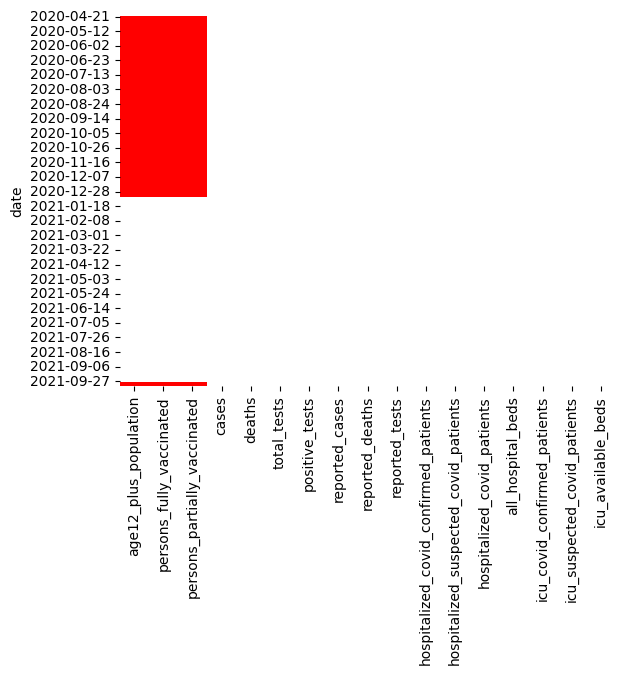

In [81]:
merg_plot = df_final[['date', 'age12_plus_population', 'persons_fully_vaccinated',
                         'persons_partially_vaccinated', 'cases', 'deaths', 'total_tests',
                         'positive_tests', 'reported_cases', 'reported_deaths', 'reported_tests',
                         'hospitalized_covid_confirmed_patients',
                         'hospitalized_suspected_covid_patients', 'hospitalized_covid_patients',
                         'all_hospital_beds', 'icu_covid_confirmed_patients',
                         'icu_suspected_covid_patients', 'icu_available_beds']].copy()
merg_plot["date"] = pd.to_datetime(merg_plot["date"]).dt.date
merg_plot.set_index("date", inplace = True)

sns.heatmap(merg_plot.isnull(), cbar = False, cmap=sns.color_palette(['white', 'red']))
plt.show()

Looking at the missing values some things will be undertaken:
- Persons_partially_vaccinated: the first block will be filled in from circa april 2020 till the end of december of 2020. The lower block of these missing values will be deleted.
  The reason that we do this is because person_partially_vaccinated has a first value which is really high (56409), we think that is unlogical that the partially vaccinated people starts with a value that high. So we want this value to decline over the days.
- Age12_plus_population: we will delete this column, since we don't think it will add value to the model. 
- Persons_fully_vaccinated: we will fill in the top missing values by zero. Since the first value of this column is not really high, we think that it makes sense that this is the first time people are fully vaccinated. Since it takes a minimum of half a year to be fully vaccinated. the bottem portion are in the last days of the dataset. these values will be deleted in one of the following steps due to the fact that we are unable to regress the last 14 days of the data on expected hospitalizations.


In [82]:
df_final = df_final.drop(columns = ["age12_plus_population"]) 

In [83]:
df_final['persons_fully_vaccinated'] = df_final['persons_fully_vaccinated'].fillna(0)

Now that we have filled some of the missing data, we will do an intermediate check.

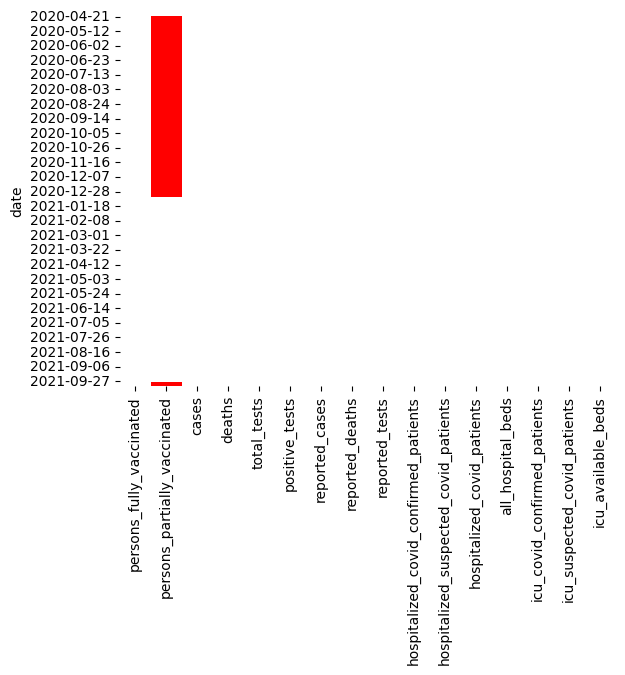

In [84]:
df_final = df_final.sort_values(by="date")
merg_plot = df_final[['date', 'persons_fully_vaccinated',
                         'persons_partially_vaccinated', 'cases', 'deaths', 'total_tests',
                         'positive_tests', 'reported_cases', 'reported_deaths', 'reported_tests',
                         'hospitalized_covid_confirmed_patients',
                         'hospitalized_suspected_covid_patients', 'hospitalized_covid_patients',
                         'all_hospital_beds', 'icu_covid_confirmed_patients',
                         'icu_suspected_covid_patients', 'icu_available_beds']].copy()
merg_plot["date"] = pd.to_datetime(merg_plot["date"]).dt.date
merg_plot.set_index("date", inplace = True)

sns.heatmap(merg_plot.isnull(), cbar = False, cmap=sns.color_palette(['white', 'red']))
plt.show()

Now we only need to interpolate the column, persons_partially_vaccinated. This will be done with the following function below.

In [85]:

def fill_missing_linearly(column):
    # Check if there are any missing values
    if column.isnull().any():
        # Iterate over the column
        for i in range(len(column)):
            # Skip if current value is not NaN
            if not pd.isnull(column.iloc[i]):
                continue

            # Find the next two non-NaN values to calculate the slope
            next_index_1 = next_index_2 = None
            for j in range(i+1, len(column)):
                if not pd.isnull(column.iloc[j]):
                    if next_index_1 is None:
                        next_index_1 = j
                    elif next_index_2 is None:
                        next_index_2 = j
                        break

            # Calculate and fill missing values if both non-NaN values are found
            if next_index_1 is not None and next_index_2 is not None:
                slope = (column.iloc[next_index_2] - column.iloc[next_index_1]) / (next_index_2 - next_index_1)
                # Fill the missing value by projecting backwards using the slope
                column.iloc[i] = column.iloc[next_index_1] - slope * (next_index_1 - i)

    return column


df_final['persons_partially_vaccinated'] = fill_missing_linearly(df_final['persons_partially_vaccinated'])


C:\Users\vande\AppData\Local\Temp\ipykernel_1764\1974577318.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.iloc[i] = column.iloc[next_index_1] - slope * (next_index_1 - i)


In [86]:
df_final.head(20)

,date,persons_fully_vaccinated,persons_partially_vaccinated,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,holiday
267,2020-04-21,0.0,-497131.0,141,3,1281,138,109,15,2063,221.0,84.0,305.0,3776.0,98.0,21.0,161.0,0
268,2020-04-22,0.0,-495002.0,156,1,1253,152,57,9,2063,241.0,77.0,318.0,5467.0,104.0,21.0,365.0,0
269,2020-04-23,0.0,-492873.0,128,9,1278,133,152,4,2063,253.0,65.0,318.0,5501.0,105.0,12.0,389.0,0
270,2020-04-24,0.0,-490744.0,161,3,1425,156,183,2,2063,257.0,78.0,335.0,5606.0,107.0,13.0,408.0,0
271,2020-04-25,0.0,-488615.0,111,3,852,83,117,9,2063,268.0,96.0,364.0,5561.0,110.0,19.0,395.0,0
272,2020-04-26,0.0,-486486.0,100,3,782,52,100,0,2063,273.0,90.0,363.0,5552.0,114.0,21.0,427.0,0
273,2020-04-27,0.0,-484357.0,142,7,1739,163,98,2,2063,277.0,59.0,336.0,5544.0,115.0,15.0,377.0,0
274,2020-04-28,0.0,-482228.0,126,5,1597,153,173,5,2063,276.0,105.0,381.0,5605.0,112.0,18.0,361.0,0
275,2020-04-29,0.0,-480099.0,130,3,1681,132,118,2,2063,282.0,73.0,355.0,5619.0,119.0,17.0,363.0,0
276,2020-04-30,0.0,-477970.0,141,5,1698,147,132,4,2063,283.0,81.0,364.0,4933.0,122.0,19.0,357.0,0


persons_partially_vaccinated now has negative values. This makes no sense, so we will replace them with 0. 

In [87]:
df_final['persons_partially_vaccinated'] = df_final['persons_partially_vaccinated'].mask(df_final['persons_partially_vaccinated'] < 0, 0)

In [88]:
df_final.info()
df_final.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 267 to 531
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date                                   532 non-null    object 
 1   persons_fully_vaccinated               532 non-null    float64
 2   persons_partially_vaccinated           527 non-null    float64
 3   cases                                  532 non-null    int64  
 4   deaths                                 532 non-null    int64  
 5   total_tests                            532 non-null    int64  
 6   positive_tests                         532 non-null    int64  
 7   reported_cases                         532 non-null    int64  
 8   reported_deaths                        532 non-null    int64  
 9   reported_tests                         532 non-null    int64  
 10  hospitalized_covid_confirmed_patients  532 non-null    float64
 11  hosp

(532, 18)

Now that we have cleaned out all missing values we need to add a column that holds the predicted data that we want to regress on. We will do this in two steps:
- First we add up all hospitalized, and offset this column by 14 days. This is done because we want to predict 14 days in the future.
- The trend of  positive tests will be calculated and added to the dataframe since this could hold valuable insights. 

First we will add a new column for total hospitalizations for the day, since we are interested in hospitalizations.

In [89]:
df_final["all_hospitalized"] = df_final["hospitalized_covid_confirmed_patients"] + df_final["hospitalized_suspected_covid_patients"] + df_final["hospitalized_covid_patients"]

In [90]:
# Shift the 'all_hospitalized' data by 14 days
df_final['hospitalized_2weeks_later'] = df_final['all_hospitalized'].shift(-14)
df_final = df_final.drop(columns=['all_hospitalized'])

Now that we have a column which represents the prediction two weeks later, we will add the trend of the positive test. We believe that the trend in the amount of positive tests, thus the amount of people getting corona, is a major factor in the amount of hospitalizations two weeks in the future.

In [91]:
df_final["positivetest_rollingwindow_7"] = df_final[['positive_tests']].rolling(window=7).mean()
df_final["positivetest_rollingwindow_14"] = df_final[['positive_tests']].rolling(window=14).mean()

These rolling windows, however, cannot be calculated over the first instances(7 and 14 respectively). And the shifted all hospitalized now holds no value in the last rows. For the rolling window of positive tests we will interpolate since this is a trend approximation. 

In [92]:
df_final["positivetest_rollingwindow_7"] = df_final["positivetest_rollingwindow_7"].fillna(method='bfill')
df_final["positivetest_rollingwindow_14"] = df_final["positivetest_rollingwindow_14"].fillna(method='bfill')

We also need to delete the missing values that have been generated by the estimation of 2 weeks into the future.

In [93]:
df_final = df_final.dropna()

Now all the data is filled. However we need to check for negative values and exclude these if possible. Negative sick people and deaths do not make sense.

In [94]:
columns_to_exclude = ['date']
columns_to_check = [col for col in df_final.columns if col not in columns_to_exclude]

negative_values_per_column = (df_final[columns_to_check] < 0).sum()
print(negative_values_per_column)

persons_fully_vaccinated                  0
persons_partially_vaccinated              0
cases                                     0
deaths                                    0
total_tests                               0
positive_tests                            0
reported_cases                            2
reported_deaths                          12
reported_tests                            5
hospitalized_covid_confirmed_patients     0
hospitalized_suspected_covid_patients     0
hospitalized_covid_patients               0
all_hospital_beds                         0
icu_covid_confirmed_patients              0
icu_suspected_covid_patients              0
icu_available_beds                        0
holiday                                   0
hospitalized_2weeks_later                 0
positivetest_rollingwindow_7              0
positivetest_rollingwindow_14             0
dtype: int64


Now that we checked for negative values we see that there are very little. Therefore we decided to drop these rows.

In [95]:
df_final = df_final[df_final['reported_cases'] >= 0]
df_final = df_final[df_final['reported_deaths'] >= 0]
df_final = df_final[df_final['reported_tests'] >= 0]

In [96]:
columns_to_exclude = ['date']
columns_to_check = [col for col in df_final.columns if col not in columns_to_exclude]

negative_values_per_column = (df_final[columns_to_check] < 0).sum()
print(negative_values_per_column)

persons_fully_vaccinated                 0
persons_partially_vaccinated             0
cases                                    0
deaths                                   0
total_tests                              0
positive_tests                           0
reported_cases                           0
reported_deaths                          0
reported_tests                           0
hospitalized_covid_confirmed_patients    0
hospitalized_suspected_covid_patients    0
hospitalized_covid_patients              0
all_hospital_beds                        0
icu_covid_confirmed_patients             0
icu_suspected_covid_patients             0
icu_available_beds                       0
holiday                                  0
hospitalized_2weeks_later                0
positivetest_rollingwindow_7             0
positivetest_rollingwindow_14            0
dtype: int64


We have now succesfully merged our data and prepared it for the next phase: Machine learning.

In [97]:
df_final.to_csv("final.csv")

# 3 Machine learning and predicition performance reporting
As mentioned in the beginning, the aim of this report was to predict future hospitalizations in the county San Diego. In the previous sections the data was explored to get a better understanding. Consequently the data was cleaned so it can be used for forecasting. This chapter will look at four different types of models to predict future hospitalizations. 

The first model that will be used is a univariate linear regression. Additionally, a linear regression on the whole dataset is conducted. Next, a decision tree will be discussed. Moreover, a random forest regression model will be used. The conclusion of this chapter will provide a recommendation regarding the most suitable model for predicting future hospitalizations in San Diego. 

## 3.1 Heatmap

Before using the different predition models, a heatmap has been carrierd out to show data correlations between several data attributes and the shifted hospitilazations.

In [98]:
from mlxtend.plotting import heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [99]:
df_final = df_final.drop(columns=['date'])


In [100]:
df = df_final
cm = np.corrcoef(df.values.T)

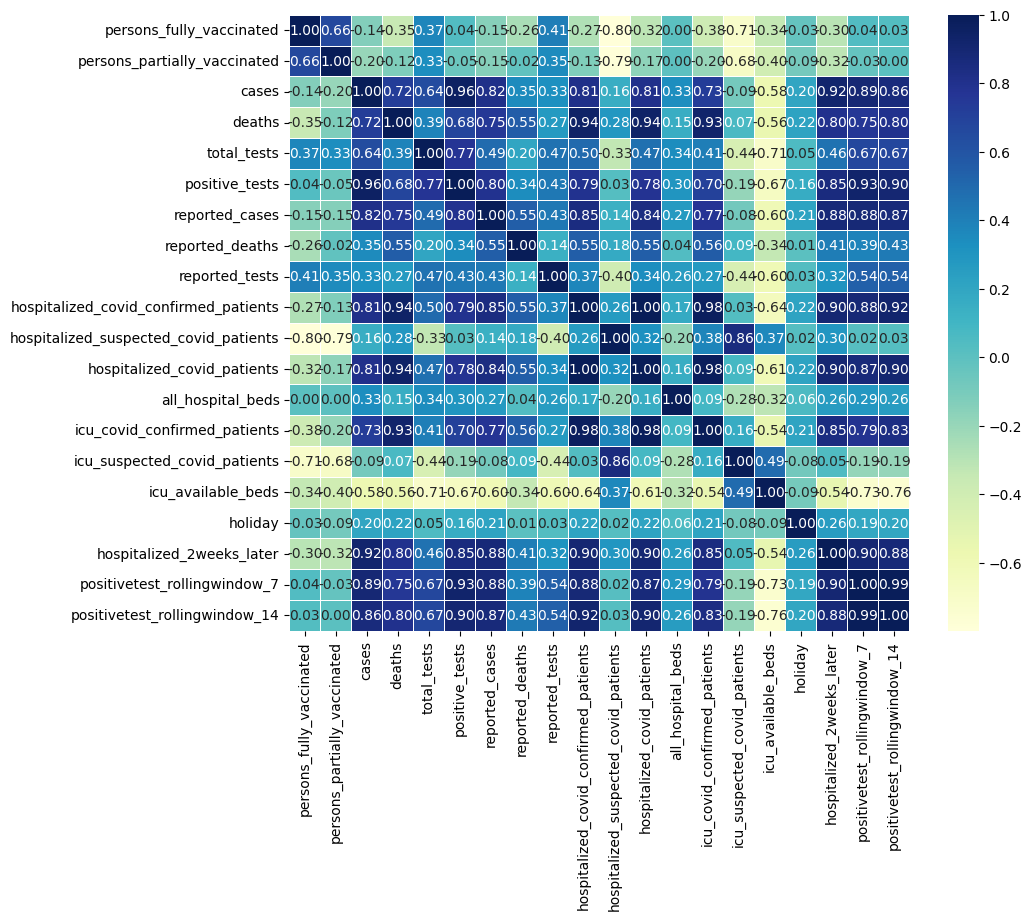

In [101]:
plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, cmap="YlGnBu", xticklabels=df.columns, yticklabels=df.columns)
# Show the heatmap
plt.show()

The heatmap shows high correlation between several data attributes and the shifted hospitilazations. For the simple  univariate linear regression model we will use the attribute: cases, since this attribute has the highest correlation(0,92) with the shifted_all_hospitalized. 

It is also interesting to note that the trends of positive tests is also highly correlated with the hospitalizations 2 weeks in the future.

## 3.2 Univariate linear regression

We will perform a simple univariate linear regression of cases on the predicted hospitalizations in the future. A univariate linear regressions helps understanding the correlation between cases and predicted hopitalizations. We can explore the relationship between variations in the number of cases and variations in the projected hospitalization rates by regressing cases versus predicted hospitalizations. Both the degree and direction of the relationship are represented by the slope of each regression line. 

Once we have a better understanding of the relationship, a univariate linear regression can be used to make predictions. If we know the number of cases, we can use the function to estimate the expected number of hospitalizaitons in the future. 


In [102]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    def predict(self, X):
        return self.net_input(X)

In [103]:
X = df[['cases']].values
y = df['hospitalized_2weeks_later'].values

We will also normalize the data to get a better model performance.

In [104]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In the following step, the regression will be performed.

In [105]:
lr = LinearRegressionGD(eta=0.1)

In [106]:
lr.fit(X_std, y_std)

In [100]:
def lin_regplot(X, y, model):
...     plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
...     plt.plot(X, model.predict(X), color='black', lw=2)

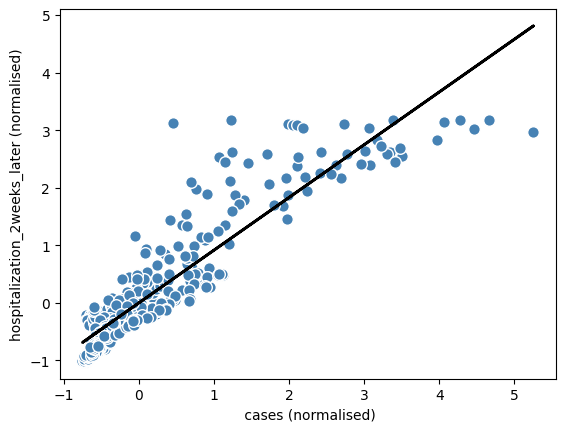

In [101]:
lin_regplot(X_std, y_std, lr)
plt.xlabel(' cases (normalised)')
plt.ylabel('hospitalization_2weeks_later (normalised)')
plt.show()

Apart from several outliers the trend is still clear, more cases today leads to higher hospitalizations in the future. 

## 3.3 Linear regression on the whole dataset

In this section we will perform linear regression of all attributes. The reason we perform a linear regression on all of the attributes is because we want to identify which attributes have a statistically significant relationship with hospitalizations. In this way we can understand which factors are most influencial on hospitalizations. In line with this, a linear regression can assist to select the most relevant variables.  

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
target = 'hospitalized_2weeks_later'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4, random_state=333) 
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

The residuals of the test data and validation data will now be shown so that we can look at how accurate our model is.

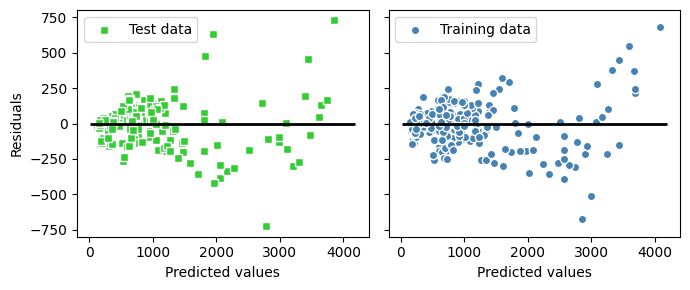

In [103]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(
            y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s',
            edgecolor='white',
            label='Test data')
ax2.scatter(
            y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')
for ax in (ax1, ax2):
        ax.set_xlabel('Predicted values')
        ax.legend(loc='upper left')
        ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100,\
        color='black', lw=2)
plt.tight_layout()
plt.show() 

The model test and training data looks to have a similar pattern, we will also take a look at the average mean error, mean squared error and the r^2 to check the fit of the model.

In [104]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 21364.14
MSE test: 25609.99


For a regression model to be effective, it must have low Mean Squared Error (MSE) values. Both during training and new unseen data. A large MSE tells us that there are a lot of outliers in the regression. 

Based on the scores above, we can conclude that there are numeral outliers in our model. 

In [105]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mean = df_final["hospitalized_2weeks_later"].mean()
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 104.63
MAE test: 113.15


The Mean Absolute Error (MAE) shows the average absolute differences between actual and predicted values. The mean of the column: hospitalizations_2weeks_later is 971.644. which means that, on average, there is a 10,7% difference with the test data and a 11,5% difference with the test data. This is considered reasonable.

In [106]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'R^2 train: {train_r2:.3f}, R^2 test: {test_r2:.3f}')

R^2 train: 0.967, R^2 test: 0.964


The R-squared value provides information about the variance in the hospitalizations. The higher the R-squared value, the better. We can say that approximately 96.7% of variance is explained in the training set. In the test set, 96.4% of the variance is explained. 

## 3.4 Deciscion tree

In this section, we will conduct a Decision Tree analysis of all attributes. The purpose of employing a Decision Tree model is to explore the complex, non-linear relationships between various attributes and hospitalizations. This approach is particularly useful in identifying how different factors collectively influence the likelihood of hospitalizations. Unlike linear regression, Decision Trees can handle non-linear interactions and provide a more intuitive understanding of how various attributes contribute to the outcome. By analyzing the tree's structure, we can pinpoint the most impactful variables and gain insights into the hierarchical importance of different factors. This will aid in understanding the key drivers of hospitalization and in developing more effective predictive models.

In [107]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In this section we will perform deciscion tree model analysis to see if that model is a better fit than the linear regression model. It defines a function for plotting regression results. 

In [108]:
def lin_regplot(X, y, model):
                plt.scatter(X, y, c='steelblue', edgecolor='white', s=80)
                plt.plot(X, model.predict(X), color='black', lw=3)

Below 'cases' and 'hospitalized_2weeks_later' are extracted as independent variables for the regression model

In [109]:
X = df[['cases']].values
y = df['hospitalized_2weeks_later'].values

We will use a depth of 3 for the tree, because this gives back the most usefull results.

In [110]:
tree = DecisionTreeRegressor(max_depth=3)

To make it possible to compare the tree model with other models, we calculated the Mean Squared Error, Mean Absolute Error and the Training Score (R^2).

In [111]:
tree.fit(X, y)
y_pred = tree.predict(X)

# Calculating Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Calculating Mean Absolute Error
mae = mean_absolute_error(y, y_pred)

# Calculating the R^2 Score
r2_score = tree.score(X, y)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Training Score (R^2):", r2_score)

Mean Squared Error: 75550.95977495155
Mean Absolute Error: 202.61407002910326
Training Score (R^2): 0.8874697530093985


To visualize the predictions of the decision tree model alongside the actual observations, the data is sorted based on the number of 'Cases'.

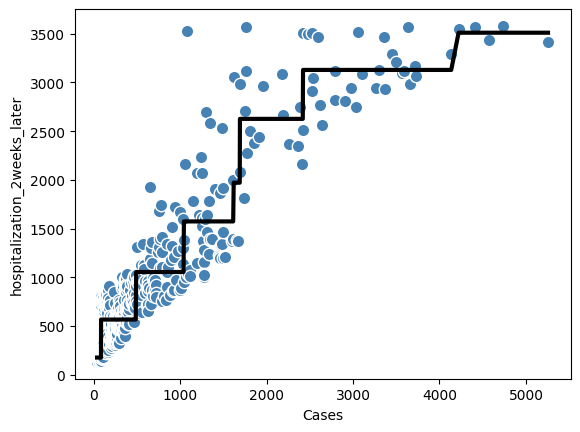

In [112]:
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Cases')
plt.ylabel('hospitalization_2weeks_later')
plt.show()

This Decision Tree regression model visualizes how the number of cases is used to predict hospitalizations two weeks later. The step-like pattern in the predictions reflect the model's splits at certain case thresholds, averaging hospitalizations within each bin. It captures the non-linear relationship between cases and hospitalizations, with each step indicating a change in predicted hospitalization rates as case numbers increase. This model provides a simplified, interpretable representation of the data, highlighting key thresholds  for understanding hospitalization trends.

## 3.5 Random Forest Regression

In this section, we will undertake a Random Forest Regression analysis on all attributes. The rationale behind using Random Forest Regression lies in its ability to handle large datasets with multiple attributes while accounting for potential interactions and non-linear relationships. This method is particularly effective for identifying which attributes significantly influence hospitalizations. Random Forest, an ensemble learning method, combines multiple decision trees to improve the model's robustness and accuracy, reducing the risk of overfitting associated with single decision trees. By examining the importance scores generated by the Random Forest model, we can discern the most influential factors in hospitalization rates. This approach not only enhances our understanding of the key drivers behind hospitalizations but also guides us in selecting the most relevant variables for predictive modeling.

In [113]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

First the target variable and the features from the dataframe needs to be defined.

In [114]:
target = 'hospitalized_2weeks_later'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values

 Then the dataset needs to be split into training and testing sets

In [115]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=123)

In [116]:
from sklearn.ensemble import RandomForestRegressor

The code below initializes the RandomForestRegressor with specified parameters. We chose a forest of 30 trees, since more trees would lead to diminishing returns when looking at the error metrics. 

In [117]:
forest = RandomForestRegressor(
n_estimators=30, # Number of trees in the forest
criterion='squared_error', # Criterion to measure the quality of a split
random_state=1, # Seed used by the random number generator
n_jobs=-1) # Number of jobs to run in parallel (-1 means using all processors)

The collected training data can then be fitted into the RandomForestRegressor

In [118]:
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1)

This will make predictions on both the training and testing sets.

In [119]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

With these predictions, two scatter plots can be created. The plots can visualize the residuals (the differences between the predicted and actual values) for both the training data and the test data. It helps in assessing the performance of a regression model, with residuals clustered around the horizontal line at 0 indicating a better fit. 

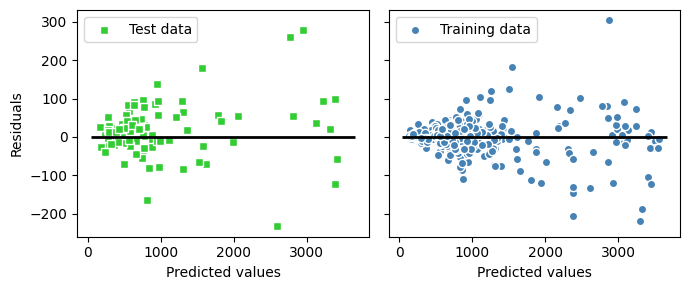

In [120]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(y_test_pred, y_test_pred - y_test,
                 c='limegreen', marker='s', edgecolor='white',
                 label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
                 c='steelblue', marker='o', edgecolor='white',
                 label='Training data')
ax1.set_ylabel('Residuals')
for ax in (ax1, ax2):
         ax.set_xlabel('Predicted values')
         ax.legend(loc='upper left')
         ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100,
                   color='black', lw=2)
plt.tight_layout()
plt.show()

The residual plots indicate that the model generally predicts accurately across both training and test datasets, as evidenced by the random scatter of residuals around the horizontal line at zero. There are some outliers present, suggesting a few predictions deviate more significantly from the actual values. Overall, the consistency in residual distribution suggests that the model's performance is stable across different data subsets.

In [121]:

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 1864.44
MSE test: 4853.93


The significantly lower MSE for the training data compared to the test data implies that the model is more accurate on familiar data but less so on new, unseen data. This disparity points to potential overfitting, where the model is tailored too closely to the training set. 

In [122]:

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mean = df_final["hospitalized_2weeks_later"].mean()
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 25.16
MAE test: 47.59


The Mean Absolute Error (MAE) values for the training and test data suggest that the model has a good fit for the training data but is less accurate on the test data, with the MAE almost doubling on the test set.

In [123]:

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'R^2 train: {train_r2:.3f}, R^2 test: {test_r2:.3f}')

R^2 train: 0.997, R^2 test: 0.993


The R² scores are very high for both the training and test datasets, indicating that the model explains a large proportion of the variance in the target variable.

## 3.6 Conslusion

Looking at the different models, with the respective measures of error, it becomes evident that the random forest regression model has the best fit with the data. Allthough, at first, it seemed that the model is overfit with the training data, it still performed relatively better on the test data than the other models did on the training data. The MSE of the random forest regresssion on the **test** data was 4853.93, while the linear regression model had a MSE of 21364.14 on the **training** data and the deciscion tree model had an MSE of 75550.96. 

Looking into more detail regarding the random forest regression model, the MAE on the test data was 47.59. when compared to the mean value of the hospitalizations_2weeks_later(971.644) leads to an average error of 4,9%. Additionally the R^2 of the test data was 0.993.

From this we can conclude that the random forrest regression model, allthough it has a few outliers, is a good fit to the data and is able to predict hospitalizations quite well in San Diego.